In [1]:
"""Given a bank customer, build a neural network-based classifier that can determine whether 
they will leave or not in the next 6 months. 
Dataset Description: The case study is from an open-source dataset from Kaggle. 
The dataset contains 10,000 sample points with 14 distinct features such as 
CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc. 
Link to the Kaggle project: 
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling  
Perform following steps: 
1. Read the dataset. 
2. Distinguish the feature and target set and divide the data set into training and test sets. 
3. Normalize the train and test data.  
4. Initialize and build the model. Identify the points of improvement and implement the same.  
5. Print the accuracy score and confusion matrix (5 points). """

'Given a bank customer, build a neural network-based classifier that can determine whether \nthey will leave or not in the next 6 months. \nDataset Description: The case study is from an open-source dataset from Kaggle. \nThe dataset contains 10,000 sample points with 14 distinct features such as \nCustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc. \nLink to the Kaggle project: \nhttps://www.kaggle.com/barelydedicated/bank-customer-churn-modeling  \nPerform following steps: \n1. Read the dataset. \n2. Distinguish the feature and target set and divide the data set into training and test sets. \n3. Normalize the train and test data.  \n4. Initialize and build the model. Identify the points of improvement and implement the same.  \n5. Print the accuracy score and confusion matrix (5 points). '

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\abc\Downloads\ML,DAA,BT PR\ML\Ml PR2\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# input data

x = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

#  output data

y = df[['Exited']]

In [6]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [7]:
# sns.countplot(x = y);

In [8]:
y.value_counts()

Exited
0         7963
1         2037
Name: count, dtype: int64

In [9]:
!pip install -U scikit-learn imbalanced-learn


In [25]:
# for balancing of dataset
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 0)

x_res , y_res = ros.fit_resample(x,y)

y_res.value_counts()

Exited
0         7963
1         7963
Name: count, dtype: int64

In [26]:
# Normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_res)

x_scaled

array([[-0.29877723,  0.08418894, -1.01840607, ...,  0.6512495 ,
         1.08223556,  0.00817382],
       [-0.4103938 , -0.01032629, -1.36135608, ..., -1.53550983,
         1.08223556,  0.20261687],
       [-1.48597169,  0.08418894,  1.03929402, ...,  0.6512495 ,
        -0.92401325,  0.22674468],
       ...,
       [-0.84671313,  1.02934128,  0.01044398, ...,  0.6512495 ,
        -0.92401325,  1.28878188],
       [-0.96847667,  0.65128034, -0.67545605, ..., -1.53550983,
         1.08223556, -1.21851316],
       [-1.5874413 ,  0.74579558,  1.03929402, ...,  0.6512495 ,
         1.08223556,  1.42417217]])

In [28]:
# cross validation
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_res, random_state = 0, test_size = 0.25)
x.shape

(10000, 8)

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
ann = MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=0,max_iter = 100,activation ='relu')

In [32]:
ann.fit(x_train,y_train)

C:\Users\NAVNATH\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NAVNATH\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [33]:
y_pred = ann.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
y_test.value_counts()

Exited
1         2001
0         1981
Name: count, dtype: int64

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.metrics import accuracy_score

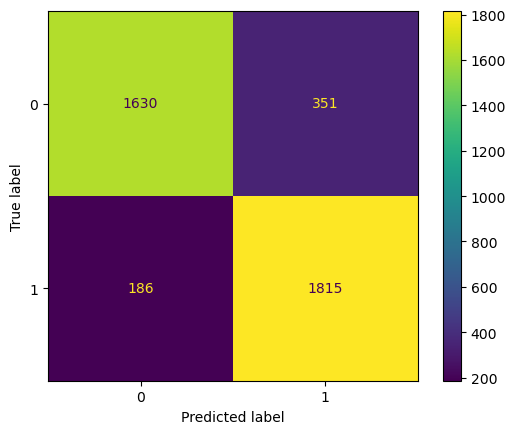

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [37]:
accuracy_score(y_test,y_pred)

0.865143144148669

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1981
           1       0.84      0.91      0.87      2001

    accuracy                           0.87      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.87      0.87      0.86      3982

